In [1]:
import numpy as np
import xarray as xr
import xrft
import matplotlib.pyplot as plt
%matplotlib inline

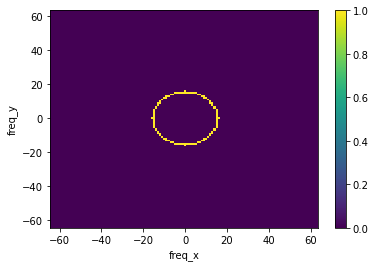

In [38]:
N = 128
k = np.arange(-N/2,N/2)
l = np.arange(-N/2,N/2)

A = 1
F = xr.DataArray(np.zeros((len(k),len(l))), dims=['freq_y','freq_x'], coords={'freq_x':k,'freq_y':l})
kr = 16
mask = ~F.where(np.sqrt(F.freq_x**2+F.freq_y**2)<=kr).where(np.sqrt(F.freq_x**2+F.freq_y**2)>=kr-1).to_masked_array().mask

F = F+mask
F.plot()

In [39]:
phi = np.zeros((N, N))

N_2 = int(N / 2)
phi_upper_right = 2.0 * np.pi * np.random.random((N_2 - 1, N_2 - 1)) - np.pi
phi[N_2 + 1 :, N_2 + 1 :] = phi_upper_right.copy()
phi[1:N_2, 1:N_2] = -phi_upper_right[::-1, ::-1].copy()

phi_upper_left = 2.0 * np.pi * np.random.random((N_2 - 1, N_2 - 1)) - np.pi
phi[N_2 + 1 :, 1:N_2] = phi_upper_left.copy()
phi[1:N_2, N_2 + 1 :] = -phi_upper_left[::-1, ::-1].copy()

phi_upper_middle = 2.0 * np.pi * np.random.random(N_2) - np.pi
phi[N_2:, N_2] = phi_upper_middle.copy()
phi[1:N_2, N_2] = -phi_upper_middle[1:][::-1].copy()

phi_right_middle = 2.0 * np.pi * np.random.random(N_2 - 1) - np.pi
phi[N_2, N_2 + 1 :] = phi_right_middle.copy()
phi[N_2, 1:N_2] = -phi_right_middle[::-1].copy()

phi_edge_upperleft = 2.0 * np.pi * np.random.random(N_2) - np.pi
phi[N_2:, 0] = phi_edge_upperleft.copy()
phi[1:N_2, 0] = -phi_edge_upperleft[1:][::-1].copy()

phi_bot_right = 2.0 * np.pi * np.random.random(N_2) - np.pi
phi[0, N_2:] = phi_bot_right.copy()
phi[0, 1:N_2] = -phi_bot_right[1:][::-1].copy()

phi_corner_leftbot = 2.0 * np.pi * np.random.random() - np.pi

phase = np.exp(1j*phi)

In [40]:
Ff = F*phase

/tank/users/tuchida/xrft/xrft/xrft.py:556: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


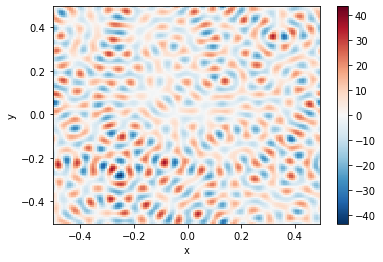

In [42]:
invFf = xrft.ifft(Ff, dim=['freq_y','freq_x'], true_phase=True, true_amplitude=True).real
invFf.plot()